In [2]:
import os
from Pre_Processing import preprocess_text
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [3]:
# Extract Texts from Folders
def read_reviews(reviews_path):
    reviews = []
    for filename in os.listdir(reviews_path):
        if filename.endswith(".txt"):
            with open(os.path.join(reviews_path, filename), 'r', encoding='ISO-8859-1') as file:
                reviews.append(file.read())
    return reviews

In [4]:
# Define the paths to the positive and negative reviews
pos_reviews_path = r'D:\Gethub\Sentiment-Analysis-of-Movie-Reviews\Augmented_Dataset\pos'
neg_reviews_path = r'D:\Gethub\Sentiment-Analysis-of-Movie-Reviews\Augmented_Dataset\neg'

# Read the positive and negative reviews
original_pos_reviews = read_reviews(pos_reviews_path)
original_neg_reviews = read_reviews(neg_reviews_path)

In [5]:
print("Lenght Of Positive Reviews: ", len(original_pos_reviews))
print("Lenght Of Negative Reviews: ", len(original_neg_reviews))

Lenght Of Positive Reviews:  2000
Lenght Of Negative Reviews:  2000


In [6]:
# Preprocess the reviews
positive_reviews = preprocess_text(original_pos_reviews)
negative_reviews = preprocess_text(original_neg_reviews)

In [7]:
# Concatenate the list of reviews into a single string
all_reviews = [' '.join(word) for word in positive_reviews + negative_reviews]

# Create labels for the reviews
labels = [1] * len(positive_reviews) + [0] * len(negative_reviews)

# TF-IDF feature extraction
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(all_reviews)
y = labels

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [9]:
def eval_model(classifier, Xx_test, Yy_test, model_name):
    # Evaluate the model
    predictions = classifier.predict(Xx_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(Yy_test, predictions)

    # Print the accuracy of the model
    print(model_name, "- Accuracy:", accuracy * 100, "%")

    # Calculate Precision, Recall, F1 Score
    precision = precision_score(Yy_test, predictions)
    recall = recall_score(Yy_test, predictions)
    f1 = f1_score(Yy_test, predictions)

    # Print Precision, Recall, F1 Score
    print(model_name, "- Precision:", precision * 100, "%")
    print(model_name, "- Recall:", recall * 100, "%")
    print(model_name, "- F1 Score:", f1 * 100, "%")
    return accuracy, precision, recall, f1

In [10]:
# Train Logistic Regression on the training set
lr_classifier = LogisticRegression(random_state=42, C=100, max_iter=100, solver='newton-cg')
lr_classifier.fit(X_train, y_train)

# Calculate and print the training accuracy
training_accuracy = lr_classifier.score(X_train, y_train)
print(f'Logistic Regression on Training Set - Accuracy: {training_accuracy*100} %')
print('-------------------------------------------------------------------------')

# Evaluate Logistic Regression on the test set
lr_accuracy, lr_precision, lr_recall, lr_f1 = eval_model(lr_classifier, X_test, y_test, "Logistic Regression on Test Set")

Logistic Regression on Training Set - Accuracy: 100.0 %
-------------------------------------------------------------------------
Logistic Regression on Test Set - Accuracy: 96.125 %
Logistic Regression on Test Set - Precision: 96.43705463182897 %
Logistic Regression on Test Set - Recall: 96.2085308056872 %
Logistic Regression on Test Set - F1 Score: 96.3226571767497 %


In [11]:
# Train Support Vector Machine
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# Calculate and print the training accuracy
training_accuracy = svm_classifier.score(X_train, y_train)
print(f'Support Vector Machine on Training Set - Accuracy: {training_accuracy*100} %')
print('-------------------------------------------------------------------------')

# Evaluate Support Vector Machine on the test set
svm_accuracy, svm_precision, svm_recall, svm_f1 = eval_model(svm_classifier, X_test, y_test, "Support Vector Machine on Test Set")

Support Vector Machine on Training Set - Accuracy: 99.65625 %
-------------------------------------------------------------------------
Support Vector Machine on Test Set - Accuracy: 94.5 %
Support Vector Machine on Test Set - Precision: 94.1588785046729 %
Support Vector Machine on Test Set - Recall: 95.49763033175356 %
Support Vector Machine on Test Set - F1 Score: 94.82352941176471 %


In [12]:
# Train Random Forest
rf_classifier = RandomForestClassifier(n_estimators=300, max_depth= 30, min_samples_leaf= 2, random_state=42)
rf_classifier.fit(X_train, y_train)
# Calculate and print the training accuracy
training_accuracy = rf_classifier.score(X_train, y_train)
print(f'Random Forest on Training Set - Accuracy: {training_accuracy*100} %')
print('-------------------------------------------------------------------------')

# Evaluate Random Forest on the test set
rf_accuracy, rf_precision, rf_recall, rf_f1 = eval_model(rf_classifier, X_test, y_test, "Random Forest on Test Set")

Random Forest on Training Set - Accuracy: 99.9375 %
-------------------------------------------------------------------------
Random Forest on Test Set - Accuracy: 91.25 %
Random Forest on Test Set - Precision: 93.13725490196079 %
Random Forest on Test Set - Recall: 90.04739336492891 %
Random Forest on Test Set - F1 Score: 91.56626506024097 %


In [13]:
# Train Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
# Calculate and print the training accuracy
training_accuracy = nb_classifier.score(X_train, y_train)
print(f'Naive Bayes on Training Set - Accuracy: {training_accuracy*100} %')
print('-------------------------------------------------------------------------')

# Evaluate Naive Bayes on the test set
nb_accuracy, nb_precision, nb_recall, nb_f1 = eval_model(nb_classifier, X_test, y_test, "Naive Bayes on Test Set")

Naive Bayes on Training Set - Accuracy: 95.96875 %
-------------------------------------------------------------------------
Naive Bayes on Test Set - Accuracy: 88.875 %
Naive Bayes on Test Set - Precision: 92.36641221374046 %
Naive Bayes on Test Set - Recall: 86.01895734597157 %
Naive Bayes on Test Set - F1 Score: 89.079754601227 %


In [54]:
# Define lists to store performance metrics for each model
models = ['Logistic Regression', 'SVM', 'Random Forest', 'Naive Bayes']
accuracies = [lr_accuracy, svm_accuracy, rf_accuracy, nb_accuracy]
precisions = [lr_precision, svm_precision, rf_precision, nb_precision]
recalls = [lr_recall, svm_recall, rf_recall, nb_recall]
f1_scores = [lr_f1, svm_f1, rf_f1, nb_f1]

In [55]:
# Multiply the values by 100
accuracies = [acc * 100 for acc in accuracies]
precisions = [pre * 100 for pre in precisions]
recalls = [rec * 100 for rec in recalls]
f1_scores = [f1 * 100 for f1 in f1_scores]

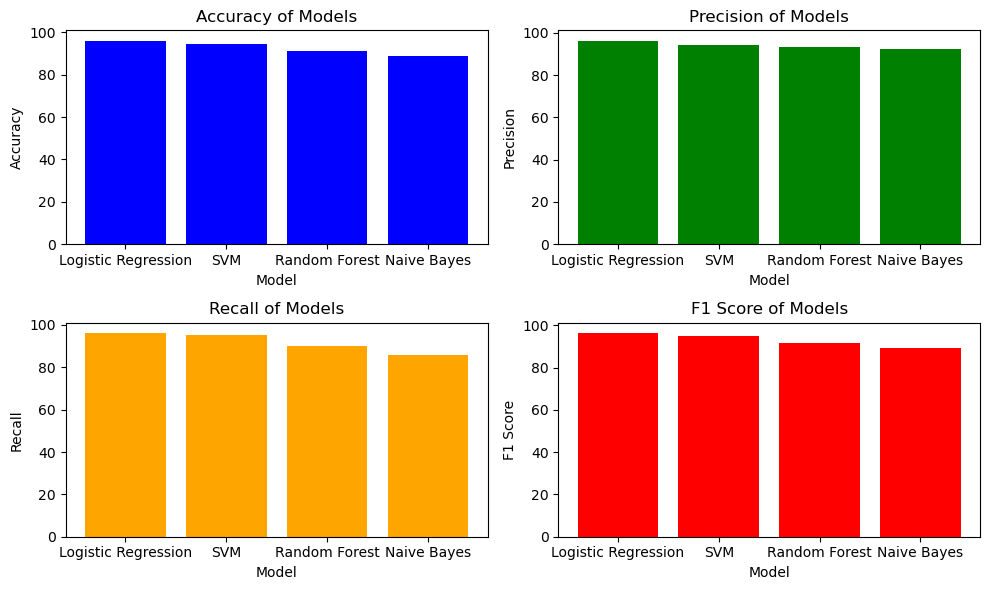

In [56]:
# Plot performance metrics for each model
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.bar(models, accuracies, color='blue')
plt.title('Accuracy of Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 2)
plt.bar(models, precisions, color='green')
plt.title('Precision of Models')
plt.xlabel('Model')
plt.ylabel('Precision')

plt.subplot(2, 2, 3)
plt.bar(models, recalls, color='orange')
plt.title('Recall of Models')
plt.xlabel('Model')
plt.ylabel('Recall')

plt.subplot(2, 2, 4)
plt.bar(models, f1_scores, color='red')
plt.title('F1 Score of Models')
plt.xlabel('Model')
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()

In [57]:
import joblib

# Define the file path where you want to save the model
model_file_path = r"D:\Gethub\Sentiment-Analysis-of-Movie-Reviews\Saved_Models\logistic_regression_model.pkl"

# Save the trained model to disk
joblib.dump(lr_classifier, model_file_path)

print("Logistic Regression Model saved successfully!")


Logistic Regression Model saved successfully!


In [58]:
# Define the file path where you want to save the model
model_file_path = r"D:\Gethub\Sentiment-Analysis-of-Movie-Reviews\Saved_Models\svm_model.pkl"

# Save the trained model to disk
joblib.dump(svm_classifier, model_file_path)

print("SVM Model saved successfully!")

SVM Model saved successfully!


In [59]:
# Define the file path where you want to save the model
model_file_path = r"D:\Gethub\Sentiment-Analysis-of-Movie-Reviews\Saved_Models\naive_bayes_model.pkl"

# Save the trained model to disk
joblib.dump(nb_classifier, model_file_path)

print("Naive Bayes Model saved successfully!")

Naive Bayes Model saved successfully!


In [60]:
# Define the file path where you want to save the model
model_file_path = r"D:\Gethub\Sentiment-Analysis-of-Movie-Reviews\Saved_Models\random_forest_model.pkl"

# Save the trained model to disk
joblib.dump(rf_classifier, model_file_path)

print("Random Forest Model saved successfully!")

Random Forest Model saved successfully!


In [61]:
# Load the saved model from disk
model_file_path = r"D:\Gethub\Sentiment-Analysis-of-Movie-Reviews\Saved_Models\logistic_regression_model.pkl"
lr_model = joblib.load(model_file_path)

# Evaluate the loaded model on the test set
eval_model(lr_model, X_test, y_test, "Logistic Regression on Test Set")

Logistic Regression on Test Set - Accuracy: 96.125 %
Logistic Regression on Test Set - Precision: 96.43705463182897 %
Logistic Regression on Test Set - Recall: 96.2085308056872 %
Logistic Regression on Test Set - F1 Score: 96.3226571767497 %


(0.96125, 0.9643705463182898, 0.9620853080568721, 0.963226571767497)

## New Dataset For Testing

In [62]:
# Extract reviews from Files
def read_test_reviews(reviews_path):
    with open(reviews_path, 'r', encoding='ISO-8859-1') as file:
        # Read each line and store it in a list
        test_reviews = [line.strip() for line in file]
    return test_reviews

In [63]:
# Define the paths to the positive and negative reviews
test_pos_reviews_path = r'D:\Gethub\Sentiment-Analysis-of-Movie-Reviews\Final_Test_Dataset\pos.txt'
test_neg_reviews_path = r'D:\Gethub\Sentiment-Analysis-of-Movie-Reviews\Final_Test_Dataset\neg.txt'

# Read the positive and negative reviews
test_pos_reviews = read_test_reviews(test_pos_reviews_path)
test_neg_reviews = read_test_reviews(test_neg_reviews_path)

In [64]:
# Preprocess the reviews
test_positive_reviews = preprocess_text(test_pos_reviews)
test_negative_reviews = preprocess_text(test_neg_reviews)

In [65]:
# Concatenate the list of reviews into a single string
all_reviews = [' '.join(word) for word in test_positive_reviews + test_negative_reviews]

# Create labels for the reviews
labels = [1] * len(test_positive_reviews) + [0] * len(test_negative_reviews)

X_final_test = vectorizer.transform(all_reviews)
y_final_test = labels

In [66]:
lr_results = lr_classifier.predict(X_final_test)
lr_test_accuracy = accuracy_score(y_final_test, lr_results)

svm_results = svm_classifier.predict(X_final_test)
svm_test_accuracy = accuracy_score(y_final_test, svm_results)

nb_results = nb_classifier.predict(X_final_test)
nb_test_accuracy = accuracy_score(y_final_test, nb_results)

rf_results = rf_classifier.predict(X_final_test)
rf_test_accuracy = accuracy_score(y_final_test, rf_results)

In [67]:
print("Final Test Accuracy using Naive Bayes:", nb_test_accuracy * 100, "%")

print("Final Test Accuracy using Logistic Regression:", lr_test_accuracy * 100, "%")

print("Final Test Accuracy using Support Vector Machine:", svm_test_accuracy * 100, "%")

print("Final Test Accuracy using Random Forest:", rf_test_accuracy * 100, "%")

Final Test Accuracy using Naive Bayes: 70.26824235603077 %
Final Test Accuracy using Logistic Regression: 69.43350215719377 %
Final Test Accuracy using Support Vector Machine: 69.11461264303132 %
Final Test Accuracy using Random Forest: 53.80791596323391 %
